In [1]:
from google.colab import drive
import os
import shutil
import zipfile
from sklearn.model_selection import train_test_split
import os
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Mount Google Drive
drive.mount('/content/drive')


# Set the path to your dataset zip file and extraction folder
zip_file_path = '/content/drive/MyDrive/dataset_xml_format2.zip'
extracted_folder_path = '/content/dataset_xml_folder/'

# Set the paths for train and test folders
train_folder_path = '/content/train/'
test_folder_path = '/content/test/'


os.makedirs(train_folder_path, exist_ok=True)
os.makedirs(test_folder_path, exist_ok=True)


with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# Get a list of all XML files in the extracted folder
xml_files = [file for file in os.listdir(os.path.join(extracted_folder_path, "dataset_xml_format2")) if file.endswith('.xml')]

num_samples = len(xml_files)

train_files, test_files = train_test_split(xml_files, test_size=0.2, random_state=42)

# Move the images and corresponding XML files to the appropriate folders
for file in train_files:
    image_file_jpg = file.replace('.xml', '.jpg')
    image_file_png = file.replace('.xml', '.png')

    # Check for both JPG and PNG image files
    if os.path.isfile(os.path.join(extracted_folder_path, "dataset_xml_format2", image_file_jpg)):
        image_file = image_file_jpg
    elif os.path.isfile(os.path.join(extracted_folder_path, "dataset_xml_format2", image_file_png)):
        image_file = image_file_png
    else:
        # Handle the case when neither JPG nor PNG file is found
        print(f"Image file not found for {file}")
        continue

    shutil.move(os.path.join(extracted_folder_path, "dataset_xml_format2", file), os.path.join(train_folder_path, file))
    shutil.move(os.path.join(extracted_folder_path, "dataset_xml_format2", image_file), os.path.join(train_folder_path, image_file))

for file in test_files:
    image_file_jpg = file.replace('.xml', '.jpg')
    image_file_png = file.replace('.xml', '.png')

    # Check for both JPG and PNG image files
    if os.path.isfile(os.path.join(extracted_folder_path, "dataset_xml_format2", image_file_jpg)):
        image_file = image_file_jpg
    elif os.path.isfile(os.path.join(extracted_folder_path, "dataset_xml_format2", image_file_png)):
        image_file = image_file_png
    else:
        # Handle the case when neither JPG nor PNG file is found
        print(f"Image file not found for {file}")
        continue

    shutil.move(os.path.join(extracted_folder_path, "dataset_xml_format2", file), os.path.join(test_folder_path, file))
    shutil.move(os.path.join(extracted_folder_path, "dataset_xml_format2", image_file), os.path.join(test_folder_path, image_file))

print("Dataset split into train and test folders successfully.")


Mounted at /content/drive
Dataset split into train and test folders successfully.


In [6]:
! python3 -m pip install tensorflow[and-cuda]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 845.8/845.8 kB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 720.1/720.1 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.3/195.3 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 32.4 MB/s eta 0:00:00
  Preparing metadata (

In [2]:
num_train_files = len(os.listdir(train_folder_path))
num_test_files = len(os.listdir(test_folder_path))

print(f"Number of files in train folder: {num_train_files}")
print(f"Number of files in test folder: {num_test_files}")

Number of files in train folder: 136
Number of files in test folder: 34


In [3]:
!git clone https://github.com/tensorflow/models.git


Cloning into 'models'...
remote: Enumerating objects: 90183, done.
remote: Counting objects: 100% (203/203), done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 90183 (delta 118), reused 173 (delta 93), pack-reused 89980
Receiving objects: 100% (90183/90183), 606.67 MiB | 15.75 MiB/s, done.
Resolving deltas: 100% (64966/64966), done.


In [4]:
%cd models/research/
!protoc object_detection/protos/*.proto --python_out=.
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .

/content/models/research
Processing /content/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 74.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 101.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 81.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 12.2 MB/s eta 0:00:00
  Prepar

In [12]:
cd /content/

/content


# Model 1 - Efficient Det

In [13]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz


--2023-12-17 00:07:37--  http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.10.207, 142.251.12.207, 172.217.194.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.10.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30736482 (29M) [application/x-tar]
Saving to: ‘efficientdet_d0_coco17_tpu-32.tar.gz’

efficientdet_d0_coc 100%[===================>]  29.31M  11.7MB/s    in 2.5s    

2023-12-17 00:07:40 (11.7 MB/s) - ‘efficientdet_d0_coco17_tpu-32.tar.gz’ saved [30736482/30736482]



In [14]:
!tar -xzvf efficientdet_d0_coco17_tpu-32.tar.gz

efficientdet_d0_coco17_tpu-32/
efficientdet_d0_coco17_tpu-32/checkpoint/
efficientdet_d0_coco17_tpu-32/checkpoint/ckpt-0.data-00000-of-00001
efficientdet_d0_coco17_tpu-32/checkpoint/checkpoint
efficientdet_d0_coco17_tpu-32/checkpoint/ckpt-0.index
efficientdet_d0_coco17_tpu-32/pipeline.config
efficientdet_d0_coco17_tpu-32/saved_model/
efficientdet_d0_coco17_tpu-32/saved_model/saved_model.pb
efficientdet_d0_coco17_tpu-32/saved_model/assets/
efficientdet_d0_coco17_tpu-32/saved_model/variables/
efficientdet_d0_coco17_tpu-32/saved_model/variables/variables.data-00000-of-00001
efficientdet_d0_coco17_tpu-32/saved_model/variables/variables.index


# Model 2 - SSD

In [15]:
! wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz

--2023-12-17 00:07:43--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.10.207, 142.251.12.207, 172.217.194.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.10.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90453990 (86M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz’

ssd_mobilenet_v1_fp 100%[===================>]  86.26M  23.0MB/s    in 4.9s    

2023-12-17 00:07:48 (17.7 MB/s) - ‘ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz’ saved [90453990/90453990]



In [16]:
! tar -xzvf ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz

ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/pipeline.config
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.index


In [9]:
!pip uninstall tensorflow -y

# Install TensorFlow version 2.13.0
!pip install tensorflow==2.13.0

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 89.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 107.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 51.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gast-0.5.4:
      Successfully uninstalled gast-0.5.4
  Attempting uninstall: google-auth-oauthlib
 

In [18]:
# Create train data:
! python generate_tfrecord.py -x train -l label_map.pbtxt -o train.record

# Create test data:
! python generate_tfrecord.py -x test -l label_map.pbtxt -o test.record


Successfully created the TFRecord file: train.record
Successfully created the TFRecord file: test.record


# Model 1 Training

In [ ]:
! python model_main_tf2.py --model_dir=config --pipeline_config_path=config/pipeline.config


2023-12-17 00:13:55.186294: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-17 00:13:55.232542: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-17 00:13:55.233095: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-17 00:13:56.244085: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-12-17 00:14:00.928823: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob

In [ ]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path config/pipeline.config --trained_checkpoint_dir /content/config/ --output_directory /content/training_demo/exported_models/my_model1

# Model 2 Training

In [30]:
! python model_main_tf2.py --model_dir=config2 --pipeline_config_path=config2/pipeline.config


2023-12-16 03:58:33.561188: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-16 03:58:33.607110: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-16 03:58:33.607672: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-16 03:58:34.665109: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-12-16 03:58:38.672100: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Do

In [31]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path config2/pipeline.config --trained_checkpoint_dir /content/config2/ --output_directory /content/training_demo/exported_models/my_model2

2023-12-16 04:31:15.416008: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-16 04:31:15.466237: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-16 04:31:15.466830: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-16 04:31:16.572842: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-12-16 04:31:20.069677: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Do

# Combined Prediction

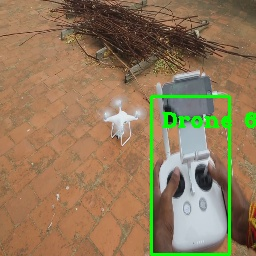

In [4]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)


IMAGE_PATHS = '/content/test/foto00088.png'

# PROVIDE PATH TO MODEL DIRECTORIES
PATH_TO_MODEL_DIR_1 = '/content/training_demo/exported_models/my_model1'
PATH_TO_MODEL_DIR_2 = '/content/training_demo/exported_models/my_model2'

PATH_TO_LABELS = '/content/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.60)

# LOAD THE MODELS

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL_1 = PATH_TO_MODEL_DIR_1 + "/saved_model"
PATH_TO_SAVED_MODEL_2 = PATH_TO_MODEL_DIR_2 + "/saved_model"


# LOAD SAVED MODELS AND BUILD DETECTION FUNCTIONS
detect_fn_1 = tf.saved_model.load(PATH_TO_SAVED_MODEL_1)
detect_fn_2 = tf.saved_model.load(PATH_TO_SAVED_MODEL_2)


# LOAD LABEL MAP DATA FOR PLOTTING
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):

    return np.array(Image.open(path))

print('Running inference for {}... '.format(IMAGE_PATHS), end='')

# Load and preprocess the image
image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image_expanded)
#Ensemble Learning with two models
# Make predictions with both models
detections_1 = detect_fn_1(input_tensor)
detections_2 = detect_fn_2(input_tensor)

# Combine the predictions (you can use different strategies based on your needs)
# Here, I'm simply averaging the confidence scores
detections_combined = {}
for key in detections_1.keys():
    detections_combined[key] = np.concatenate([detections_1[key], detections_2[key]])

num_detections = int(detections_combined.pop('num_detections'))
detections_combined = {key: value[0, :num_detections].numpy() for key, value in detections_combined.items()}
detections_combined['num_detections'] = num_detections

# detection_classes should be ints.
detections_combined['detection_classes'] = detections_combined['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# SET MIN_SCORE_THRESH BASED ON YOUR MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections_combined['detection_boxes'],
      detections_combined['detection_classes'],
      detections_combined['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.5,
      agnostic_mode=False)

print('Done')
# DISPLAYS OUTPUT IMAGE
cv2_imshow(image_with_detections)
# CLOSES WINDOW ONCE KEY IS PRESSED